In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/COVID-19_Radiography_Dataset"

In [ ]:
import numpy as np
import pandas as pd
import os

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Flatten, Input, BatchNormalization
from keras.models import Model

import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
import glob
import matplotlib.pyplot as plt
import cv2

In [ ]:
train = "/content/drive/MyDrive/COVID-19_Radiography_Dataset/Train" 
val ="/content/drive/MyDrive/COVID-19_Radiography_Dataset/Val"
test = "/content/drive/MyDrive/COVID-19_Radiography_Dataset/Test"

gen_train = ImageDataGenerator(rescale = 1./255., zoom_range = 0.2,)
gen_val = ImageDataGenerator(rescale = 1./255.)
gen_test = ImageDataGenerator(rescale = 1./255.)

train_gen = gen_train.flow_from_directory(train, batch_size=64, class_mode='binary', target_size=(220, 220))
validation_gen = gen_val.flow_from_directory(val, batch_size=64, class_mode='binary', target_size=(220, 220))
test_gen = gen_test.flow_from_directory(test, shuffle=False, batch_size=64, class_mode='binary', target_size=(220, 220))

Found 5786 images belonging to 2 classes.
Found 722 images belonging to 2 classes.
Found 722 images belonging to 2 classes.


Batch images shape: (64, 220, 220, 3)
Batch labels shape: (64,)


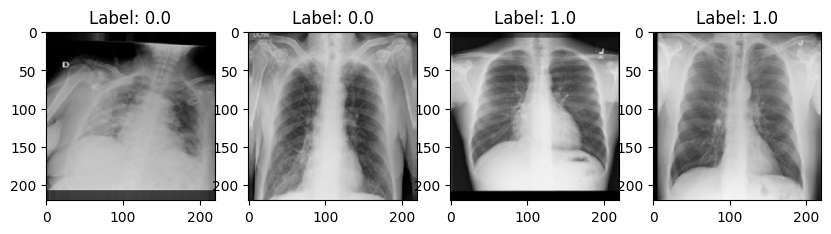

In [ ]:
# Get a batch of images and labels from train_gen
batch_images, batch_labels = next(train_gen)

# Print the shape of the batch images and labels
print('Batch images shape:', batch_images.shape)
print('Batch labels shape:', batch_labels.shape)

import matplotlib.pyplot as plt

# Plot the first 4 images in the batch
fig, axes = plt.subplots(1, 4, figsize=(10, 10))
for i in range(4):
    axes[i].imshow(batch_images[i])
    axes[i].set_title(f'Label: {batch_labels[i]}')
plt.show()


In [ ]:
input_shape = (220, 220, 3)
inputs = Input(shape=input_shape)

x = Flatten()(inputs)

Dense1 = Dense(256, activation='relu')(x)
BatchNorm1 = BatchNormalization()(Dense1)

Dense2 = Dense(256, activation='relu')(BatchNorm1)
BatchNorm2 = BatchNormalization()(Dense2)
Drop1 = Dropout(0.5)(BatchNorm2)

Dense3 = Dense(128, activation = 'relu')(Drop1)

outputs = Dense(1, activation='sigmoid')(Dense3)

model = Model(inputs=inputs, outputs=outputs)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 220, 220, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 145200)            0         
                                                                 
 dense (Dense)               (None, 256)               37171456  
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                             

In [ ]:
history = model.fit(train_gen, validation_data=validation_gen, steps_per_epoch = 64, epochs = 20)

Epoch 1/20
64/64 [==============================] - 1342s 21s/step - loss: 0.5566 - accuracy: 0.7257 - val_loss: 2.4040 - val_accuracy: 0.5000
Epoch 2/20
64/64 [==============================] - 320s 5s/step - loss: 0.4430 - accuracy: 0.7955 - val_loss: 0.3991 - val_accuracy: 0.8241
Epoch 3/20
64/64 [==============================] - 147s 2s/step - loss: 0.4061 - accuracy: 0.8083 - val_loss: 0.3952 - val_accuracy: 0.8089
Epoch 4/20
64/64 [==============================] - 96s 2s/step - loss: 0.4078 - accuracy: 0.8118 - val_loss: 0.3546 - val_accuracy: 0.8075
Epoch 5/20
64/64 [==============================] - 70s 1s/step - loss: 0.3806 - accuracy: 0.8245 - val_loss: 0.4182 - val_accuracy: 0.7548
Epoch 6/20
64/64 [==============================] - 68s 1s/step - loss: 0.3694 - accuracy: 0.8296 - val_loss: 0.1337 - val_accuracy: 0.9806
Epoch 7/20
64/64 [==============================] - 66s 1s/step - loss: 0.3474 - accuracy: 0.8457 - val_loss: 0.1323 - val_accuracy: 0.9654
Epoch 8/20
64/6

In [ ]:
np.save('history.npy', history.history)

In [ ]:
model.save("ANN_model.h5")

In [ ]:
import pickle
with open('history.pickle', 'wb') as file:
    pickle.dump(history.history, file)

In [ ]:
loss, accuracy = model.evaluate(test_gen)

# print the loss and accuracy values
print('Test loss:', loss)
print('Test accuracy:', accuracy)

12/12 [==============================] - 309s 28s/step - loss: 0.3914 - accuracy: 0.8213
Test loss: 0.39144355058670044
Test accuracy: 0.821329653263092


In [ ]:
loss, accuracy = model.evaluate(train_gen)

# print the loss and accuracy values
print('Train loss:', loss)
print('Train accuracy:', accuracy)

91/91 [==============================] - 89s 974ms/step - loss: 0.2935 - accuracy: 0.8726
Train loss: 0.2935284674167633
Train accuracy: 0.8726235628128052


In [ ]:
loss, accuracy = model.evaluate(validation_gen)

# print the loss and accuracy values
print('Validation loss:', loss)
print('Validation accuracy:', accuracy)

12/12 [==============================] - 4s 318ms/step - loss: 0.3052 - accuracy: 0.8532
Validation loss: 0.3052075505256653
Validation accuracy: 0.8531855940818787


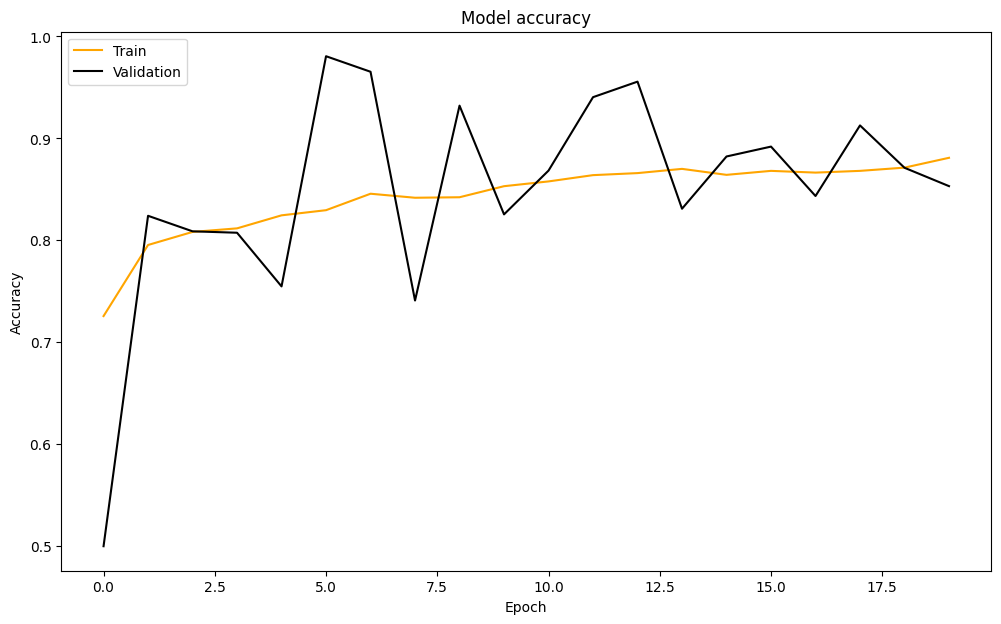

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(history.history['accuracy'], c = "orange")
ax.plot(history.history['val_accuracy'], c = "black")
ax.set_title('Model accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Validation'], loc='upper left')
plt.show()

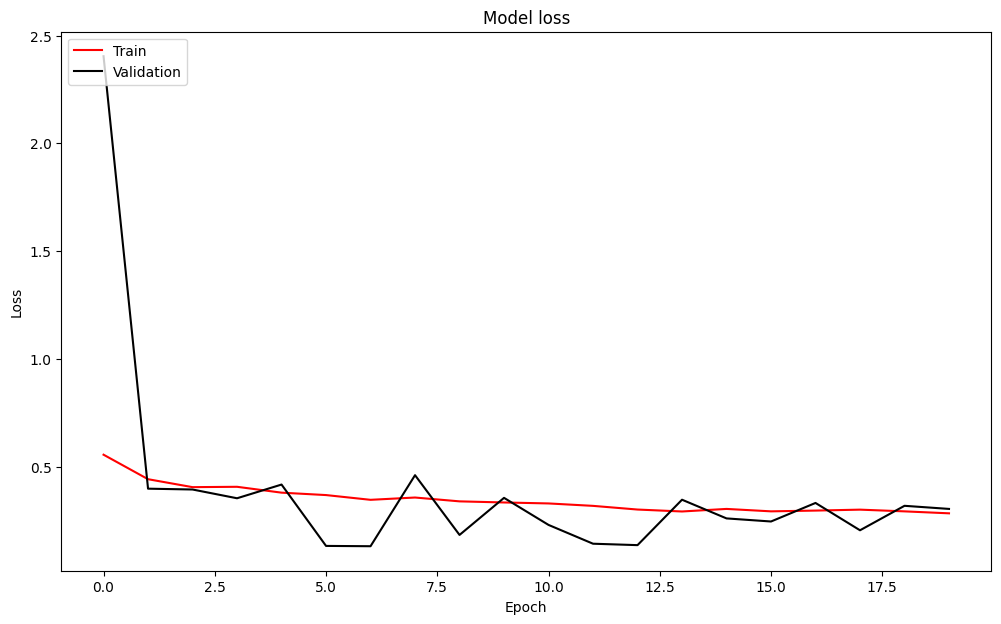

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(history.history['loss'], c ="red")
ax.plot(history.history['val_loss'], c = "black")
ax.set_title('Model loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## ANN Model with Model CheckPoint

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])
history1 = model.fit(train_gen, validation_data = validation_gen, steps_per_epoch = 32, epochs = 10, callbacks=[checkpoint])
best_model = model.load_weights('best_model.h5')

Epoch 1/10
32/32 [==============================] - 40s 1s/step - loss: 0.3163 - accuracy: 0.8642 - val_loss: 0.9534 - val_accuracy: 0.6177
Epoch 2/10
32/32 [==============================] - 36s 1s/step - loss: 0.3052 - accuracy: 0.8657 - val_loss: 0.2045 - val_accuracy: 0.9391
Epoch 3/10
32/32 [==============================] - 36s 1s/step - loss: 0.3406 - accuracy: 0.8521 - val_loss: 0.2195 - val_accuracy: 0.8975
Epoch 4/10
32/32 [==============================] - 34s 1s/step - loss: 0.2902 - accuracy: 0.8726 - val_loss: 0.6646 - val_accuracy: 0.6551
Epoch 5/10
32/32 [==============================] - 33s 1s/step - loss: 0.2874 - accuracy: 0.8701 - val_loss: 0.9618 - val_accuracy: 0.6981
Epoch 6/10
32/32 [==============================] - 35s 1s/step - loss: 0.2863 - accuracy: 0.8716 - val_loss: 0.3121 - val_accuracy: 0.8380
Epoch 7/10
32/32 [==============================] - 34s 1s/step - loss: 0.2785 - accuracy: 0.8851 - val_loss: 0.2350 - val_accuracy: 0.8740
Epoch 8/10
32/32 [==

In [ ]:
model.save("/content/drive/MyDrive/AML/ANN_model1.h5")

In [ ]:
import pickle
with open('history.pickle', 'wb') as file:
    pickle.dump(history.history, file)

In [ ]:
loss, accuracy = model.evaluate(test_gen)

# print the loss and accuracy values
print('Test loss:', loss)
print('Test accuracy:', accuracy)

12/12 [==============================] - 3s 267ms/step - loss: 0.7595 - accuracy: 0.7535
Test loss: 0.759452223777771
Test accuracy: 0.7534626126289368


In [ ]:
loss, accuracy = model.evaluate(train_gen)

# print the loss and accuracy values
print('Train loss:', loss)
print('Train accuracy:', accuracy)

91/91 [==============================] - 86s 941ms/step - loss: 0.6348 - accuracy: 0.8215
Train loss: 0.6347522735595703
Train accuracy: 0.8214656114578247


In [ ]:
loss, accuracy = model.evaluate(validation_gen)

# print the loss and accuracy values
print('Validation loss:', loss)
print('Validation accuracy:', accuracy)

12/12 [==============================] - 4s 295ms/step - loss: 0.1834 - accuracy: 0.9155
Validation loss: 0.18339598178863525
Validation accuracy: 0.9155124425888062


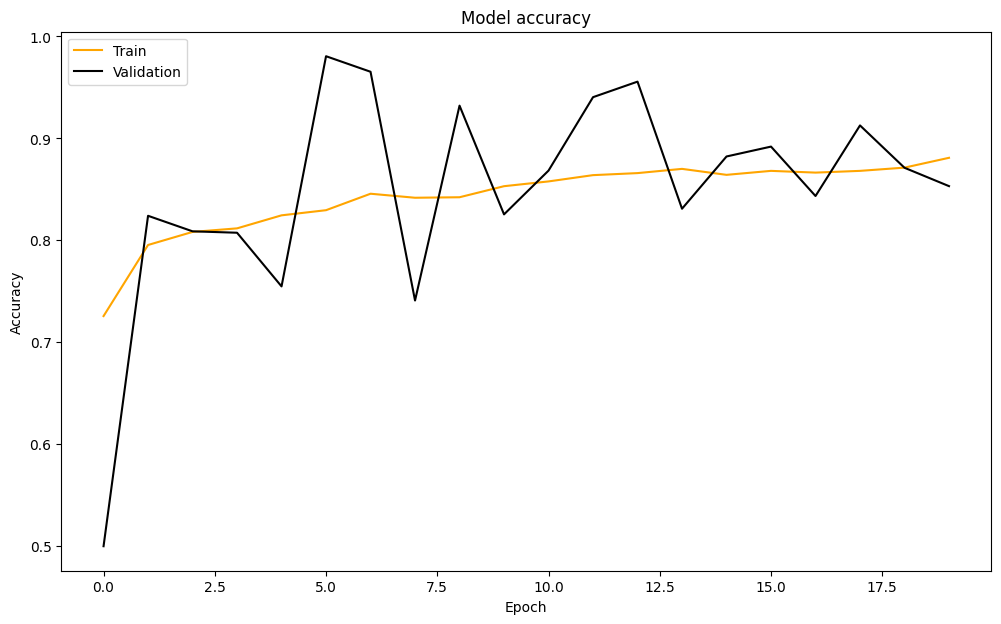

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(history.history['accuracy'], c = "orange")
ax.plot(history.history['val_accuracy'], c = "black")
ax.set_title('Model accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Validation'], loc='upper left')
plt.show()

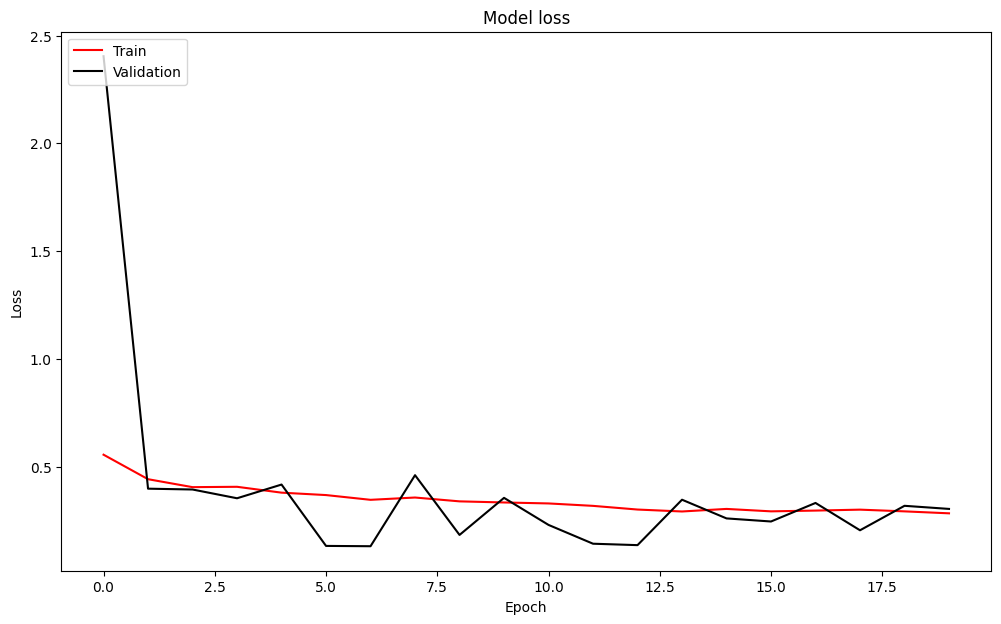

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(history.history['loss'], c ="red")
ax.plot(history.history['val_loss'], c = "black")
ax.set_title('Model loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Validation'], loc='upper left')
plt.show()